# Query 1: Salary inspection

In [11]:
# Importing libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Top 10 Salaries

In [ ]:
# Read in CSV from path
df_top_10 = pd.read_csv('C:\\Users\\PCFE\\Documents\\Casey\\Developer\\SQL_PROJECT\\PostgreSQL\\Projects\\data\\1_top_10_salaries.csv')

# Inspect data
print(df_top_10)         # Shows all 10 rows
print(df_top_10.columns)        # Lists column names

In [ ]:
# Sort by salary value desending
df_top_10_sorted = df_top_10.sort_values(by='salary_year_avg', ascending=False).head(10).copy()

print(df_top_10_sorted.shape)

# Create a fake unique index for x-axis (prevents collapsing)
df_top_10_sorted['x_axis'] = [f'Job {i+1}' for i in range(len(df_top_10_sorted))]

            # due to Seaborn groups by x + hue and averages the y value if duplicates exist.

had to create a new column in the dataframe by looping through indices from 0 to 9 (for 10 rows) uses 
f-string formatting to create strings like 'Job 1..Job 10' to provide a unique placeholder label, 
as there was mergeing of the company names, due to the top 10 posting included multiple job postings from same company.
This ensured each row gets a unique label on the x-axis, which prevents Seaborn from grouping bars.

C:\Users\PCFE\AppData\Local\Temp\ipykernel_13324\1657805414.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_top_10['company_name'], rotation=45, ha='right')
C:\Users\PCFE\AppData\Local\Temp\ipykernel_13324\1657805414.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'${int(y/1000)}K' for y in ax.get_yticks()])


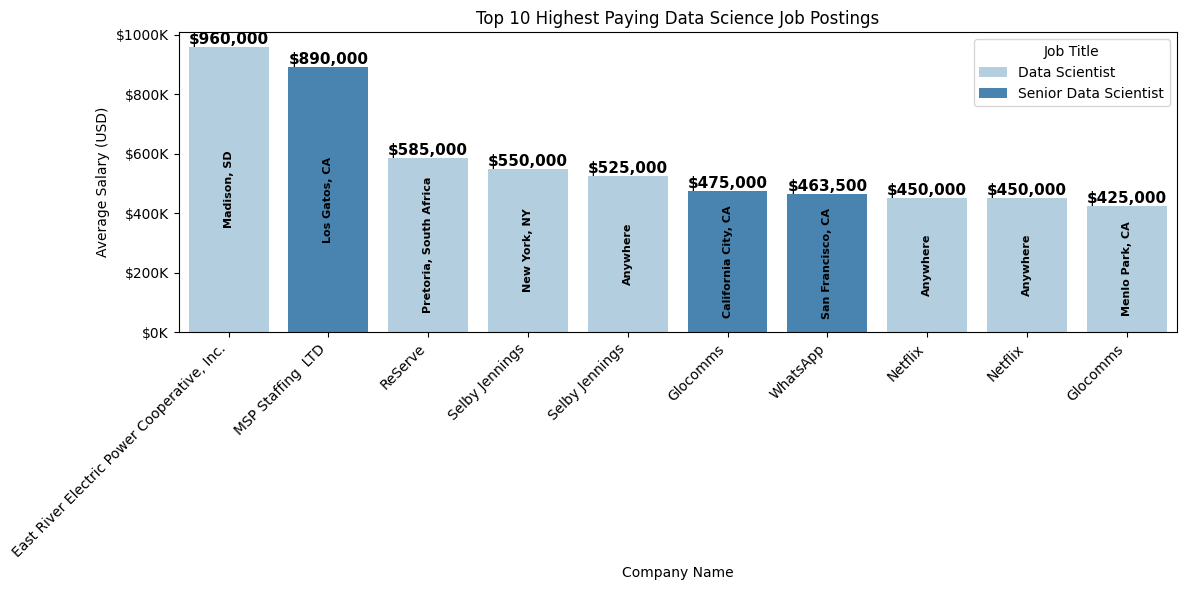

In [29]:
# obtain number of unique job titles, for colour pallet to be more informative accoridng to ranking
number_of_titles = df_top_10_sorted['job_title_short'].nunique()

# Barplot
fig, ax = plt.subplots(figsize=(12, 6))
top_10_barplot = sns.barplot(
    data=df_top_10_sorted,
    x='x_axis',
    y='salary_year_avg',
    hue='job_title_short',
    ax=ax,
    palette= sns.color_palette("Blues", n_colors=number_of_titles)#, reverse=True)
)

# Add salary values to top of each bar
for bars in top_10_barplot.containers:
    ax.bar_label(
        bars,
        labels=[f'${int(bar.get_height()):,}' for bar in bars],  # e.g., $990,000
        label_type='edge',
        fontsize=11,
        fontweight='bold'
    )

# Fix to ensure all labels match correct bars
bars = ax.patches  # Gets all bars regardless of hue

# Add job location labels inside the center of each bar
for bar, (_, row) in zip(bars, df_top_10_sorted.iterrows()):
    location = row['job_location']
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, # centers label horizontal center of the bar
        height * 0.5,  # positioning from 10% height of bar to allow room for labels
        location, # location as text
        ha='center', # horizontal alignment = center
        va='center', # vertical alaignment =  centered around the Y-coordinate (height* 10%)
        rotation=90, # Rotates the label 90 degrees (vertical orientation).
        fontsize=8,
        color='black',
        fontweight='bold'
    )

# Replace x-axis tick labels with just the company names instead of Job1..Job10
ax.set_xticklabels(df_top_10['company_name'], rotation=45, ha='right')

# Format y-axis labels for increased readability of units
ax.set_yticklabels([f'${int(y/1000)}K' for y in ax.get_yticks()])

# Formatting
plt.title('Top 10 Highest Paying Data Science Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Average Salary (USD)')
plt.xticks(ha='right'), 
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()


In labels, using f-string formatting to provide an integer value with '$' infront to show money value
and creates a list of formatted strings for all bars in one container group.

When looping through: zip(bars, df_top_10_sorted['job_location']) — it is assumed that bars 
and df_top_10_sorted['job_location'] are in exact same order and alignment. However, when you call ax.bar(...)
and use hue='job_title_short', Seaborn actually creates grouped bars and manages them as multiple sets, 
so the bars list only includes one bar per hue group. This meant zip(bars, df_top_10_sorted['job_location']) 
 may only loop through a subset of all rows, usually just the second hue category 
 (in this case "Senior Data Scientist"), so only their locations were drawn. Zip was aimed to pair the bars and the job
 title together.

 To attend to this issue, paired together each bar from the chart (ax.patches) and the corresponding data row 
 from sorted dataframe (df_top_10_sorted.iterrows()), so that the bar's height and x-position to place text and
 use the row's corresponding 'job_location' as the content of the label. 


## Salary by Seniority

In [ ]:
# Read in CSV from path
df_seniority = pd.read_csv('C:\\Users\\PCFE\\Documents\\Casey\\Developer\\SQL_PROJECT\\PostgreSQL\\Projects\\data\\1_salary_by_seniority.csv')

# Inspect data
df_seniority        

,job_title_short,min_salary,max_salary,median_salary,average_salary,number_positions
0,Data Scientist,27000.0,960000.0,127500,135929.5,5926
1,Senior Data Scientist,45000.0,890000.0,155000,154050.0,1686


In [23]:
# Reshape data to long format for grouped bar chart
df_melted = df_seniority.melt(
    id_vars='job_title_short',
    value_vars=['median_salary', 'average_salary'],
    var_name='Metric',
    value_name='Salary'
)
df_melted

,job_title_short,Metric,Salary
0,Data Scientist,median_salary,127500.0
1,Senior Data Scientist,median_salary,155000.0
2,Data Scientist,average_salary,135929.5
3,Senior Data Scientist,average_salary,154050.0


Provided representation of the job market. Data Scientist roles are far more common than Senior roles — almost 3.5x more.

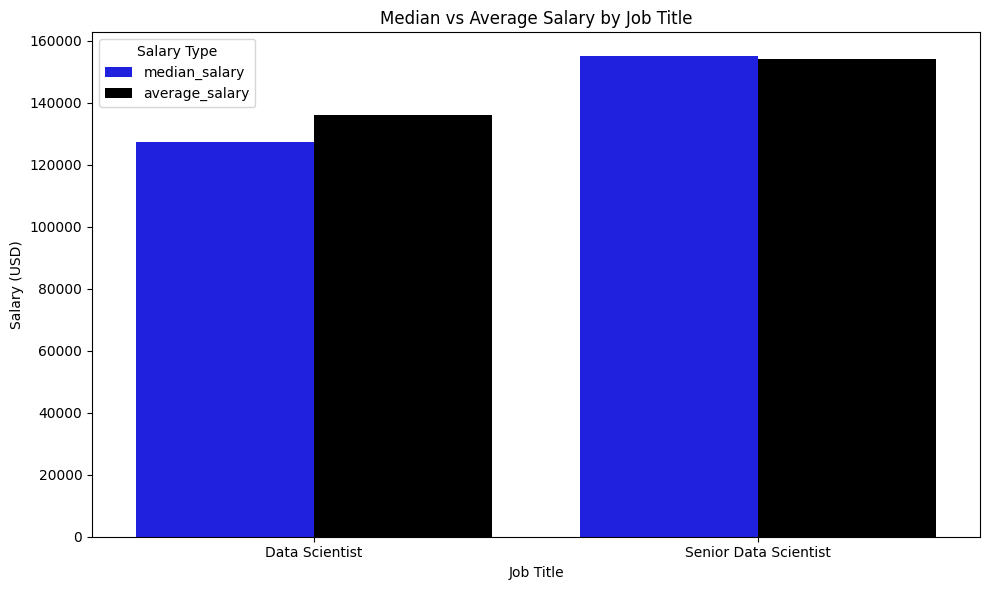

In [27]:
# Create grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    x='job_title_short',
    y='Salary',
    hue='Metric',
    palette=['blue', 'black']
)

# Formatting
plt.title('Median vs Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.legend(title='Salary Type')
plt.tight_layout()
plt.show()

Average salary is higher than the median salary for Data Scientist, suggesting right-skewed data as there is likely a high outlier present influcing the mean to increase. Average salary for Senior is 99.39% of the Median salary.  

## Salary by Location

In [4]:
# Read in CSV from path
df_location = pd.read_csv('C:\\Users\\PCFE\\Documents\\Casey\\Developer\\SQL_PROJECT\\PostgreSQL\\Projects\\data\\1_salary_by_location.csv')
df_location.head(10)
    # 1005 rows = 1005 different categories for location 

,job_location,average_salary,min_salary,median_salary,max_salary,number_of_job_postings,number_of_senior_positions
0,"Abell, MD",166075.0,166075.0,166075.0,166075.0,1,1
1,"Aberdeen Proving Ground, MD",130000.0,100000.0,130000.0,160000.0,2,0
2,"Aberdeen, MD",148000.0,112000.0,160000.0,160000.0,4,0
3,"Accokeek, MD",145000.0,145000.0,145000.0,145000.0,1,0
4,"Adelphi, OH",115000.0,115000.0,115000.0,115000.0,1,0
5,"Adger, AL",112500.5,112500.5,112500.5,112500.5,1,0
6,"Agoura Hills, CA",153333.3,152500.0,152500.0,155000.0,3,3
7,"Ahmedabad, Gujarat, India",87307.5,87307.5,87307.5,87307.5,1,0
8,Alabama,118807.5,118807.5,118807.5,118807.5,1,0
9,"Alameda, CA",159928.6,90000.0,156000.0,204000.0,7,3


The location column, due to nature of SQL query are all unique values as SQL grouped by location. However the formatting appears to be random. Need to categorise the location types. 

In [34]:
# Function to categories the different string formatting
def detect_location_format(loc):
    if pd.isna(loc): #Nan
        return 'missing'
    elif re.match(r'^[^,]+,\s*[A-Z]{2}$', loc): #One or more chaarcters, comma 9optional space) EXACTLY 2 uppercase letters
        return 'city,state_code'
    elif re.match(r'(?i)^remote$', loc): # (?i) ignores case, then 'remote' string
        return 'remote'
    elif re.match(r'^[A-Za-z\s]+$', loc): # [A-Za-z\s]+ Letters and spaces only (no comma, or numbers/special characters)
        return 'country_or_city'
    elif re.match(r'^.+,\s+[A-Za-z\s]+$', loc): # .+' = any characetr before comma, white sapce and then letters and spaces only
        return 'city,long_region'
    else:
        return 'other' # Other formats not yet detected/recongised

df_location['location_format'] = df_location['job_location'].apply(detect_location_format)

df_location['location_format'].value_counts()


location_format
city,state_code     723
city,long_region    196
country_or_city      70
other                16
Name: count, dtype: int64

In [30]:
city_state_code_format = df_location[df_location['location_format'] == 'city,state_code']
city_state_code_format.head(50)


,job_location,average_salary,min_salary,median_salary,max_salary,number_of_job_postings,number_of_senior_positions,location_format
0,"Abell, MD",166075.0,166075.000000,166075.000000,166075.000000,1,1,"city,state_code"
1,"Aberdeen Proving Ground, MD",130000.0,100000.000000,130000.000000,160000.000000,2,0,"city,state_code"
2,"Aberdeen, MD",148000.0,112000.000000,160000.000000,160000.000000,4,0,"city,state_code"
3,"Accokeek, MD",145000.0,145000.000000,145000.000000,145000.000000,1,0,"city,state_code"
4,"Adelphi, OH",115000.0,115000.000000,115000.000000,115000.000000,1,0,"city,state_code"
5,"Adger, AL",112500.5,112500.500000,112500.500000,112500.500000,1,0,"city,state_code"
6,"Agoura Hills, CA",153333.3,152500.000000,152500.000000,155000.000000,3,3,"city,state_code"
9,"Alameda, CA",159928.6,90000.000000,156000.000000,204000.000000,7,3,"city,state_code"
10,"Albany, NY",137093.8,95000.000000,139281.250000,172500.000000,6,2,"city,state_code"
11,"Albany, OR",97000.0,97000.000000,97000.000000,97000.000000,2,0,"city,state_code"


In [ ]:
other_format = df_location[df_location['location_format'] == 'other']
other_format

,job_location,average_salary,min_salary,median_salary,max_salary,number_of_job_postings,number_of_senior_positions,location_format
25,"Ankara, Türkiye",88128.0,88128.0,88128.00,88128.0,2,1,other
42,"Atlanta, GA (+52 others)",128464.0,128464.0,128464.00,128464.0,1,0,other
48,"Austin, TX (+1 other)",119290.0,119290.0,119290.00,119290.0,1,0,other
139,"Cambridge, MA (+1 other)",107500.0,107500.0,107500.00,107500.0,1,1,other
247,Dubai - United Arab Emirates,95604.9,64800.0,75600.00,166419.5,4,3,other
427,"İstanbul, Türkiye",69899.6,47370.0,70000.00,88128.0,5,1,other
525,"Los Angeles, CA (+2 others)",185000.0,185000.0,185000.00,185000.0,1,0,other
526,"Los Angeles, CA (+1 other)",225000.0,225000.0,225000.00,225000.0,1,0,other
559,"Maslak, Sarıyer/İstanbul, Türkiye",72000.0,72000.0,72000.00,72000.0,1,0,other
646,"New York, NY (+62 others)",113769.5,113769.5,113769.50,113769.5,1,0,other


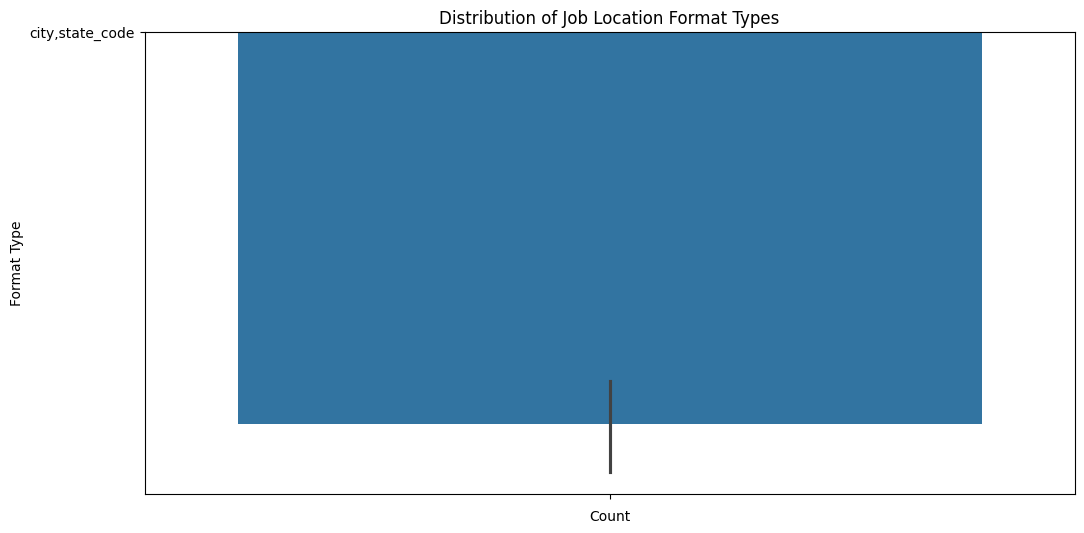

In [24]:
# Countplot showing Job Location formats 
fig, ax = plt.subplots(figsize=(12, 6))
location_format_plot = sns.barplot(
    y='location_format',
   # y='count',
    data=df_location)
plt.title('Distribution of Job Location Format Types')
plt.xlabel('Count')
plt.ylabel('Format Type')
plt.show()


The location column at inital inspect has inconsistencies with formatting, to represent the data more accurately, data needs to be cleaned. There seemed to be a frequent US-styled US locations, will attempt to split the state and city for convience of mapping and identifying how many of these locations follow this format. 

In [31]:
df_location

,job_location,average_salary,min_salary,median_salary,max_salary,number_of_job_postings,number_of_senior_positions,location_format
0,"Abell, MD",166075.0,166075.00000,166075.00000,166075.00000,1,1,"city,state_code"
1,"Aberdeen Proving Ground, MD",130000.0,100000.00000,130000.00000,160000.00000,2,0,"city,state_code"
2,"Aberdeen, MD",148000.0,112000.00000,160000.00000,160000.00000,4,0,"city,state_code"
3,"Accokeek, MD",145000.0,145000.00000,145000.00000,145000.00000,1,0,"city,state_code"
4,"Adelphi, OH",115000.0,115000.00000,115000.00000,115000.00000,1,0,"city,state_code"
...,...,...,...,...,...,...,...,...
1000,"Wylie, TX",108389.5,88365.03125,108389.53125,128414.03125,2,0,"city,state_code"
1001,"Xinyi District, Taipei City, Taiwan",31274.0,31274.00000,31274.00000,31274.00000,1,0,"city,long_region"
1002,"Zagreb, Croatia",88128.0,88128.00000,88128.00000,88128.00000,1,0,"city,long_region"
1003,"Zaventem, Belgium",157500.0,157500.00000,157500.00000,157500.00000,1,0,"city,long_region"


In [32]:
# Try to split US-style locations: "City, ST" where ST is a 2-letter state abbreviation
df_location[['city', 'state']] = df_location['job_location'].str.extract(r'^(.*?),\s*([A-Z]{2})$')
                                                                # REGEX pattern
                                                                # ^ = start of string
                                                                # (.*?) = Lazily captures all characters up to the first comma (city)
                                                                # , = comma seperates city and state
                                                                # \s* = optional whitespace after comma
                                                                # ([A-Z]{2}) Captres EXACTLY 2 uppecase letters for state/province
                                                                # captures entities with 2 letter abbreviations for states

# Count how many rows were successfully parsed (i.e., state is not null)
parsed_count = df_location['state'].notnull().sum()
total_count = len(df_location)

# Identify entries that do not match the "City, ST" pattern
unparsed_locations = df_location[df_location['state'].isnull()]['job_location'].unique()

# Print the summary
print(f"Parsed US-style locations: {parsed_count} / {total_count}")
print("Sample of non-US or nonstandard locations:")
for loc in unparsed_locations[:30]:
    print("-", loc)

Parsed US-style locations: 725 / 1005
Sample of non-US or nonstandard locations:
- Ahmedabad, Gujarat, India
- Alabama
- Almaty, Kazakhstan
- Amman, Jordan
- Amsterdam, Netherlands
- Ankara, Türkiye
- Antwerp, Belgium
- Anywhere
- Arizona
- Astana, Kazakhstan
- Athens, Greece
- Atlanta, GA   (+52 others)
- Auckland, New Zealand
- Austin, TX  (+1 other)
- Australia
- Aveiro, Portugal
- Ballerup, Denmark
- Bangkok, Thailand
- Barcelona, Spain
- Basel, Switzerland
- Bayan Lepas, Penang, Malaysia
- Belgrade, Serbia
- Bengaluru, Karnataka, India
- Bergen, Norway
- Berlin, Germany
- Biñan, Laguna, Philippines
- Bioggio, Switzerland
- Bogotá, Bogota, Colombia
- Braga, Portugal
- Bratislava, Slovakia


^(.*?),\s*([A-Z]{2})$ was used initally to extract the locations with 2 letter abbreviation after the city. However when looking at the first 30 returned locations out of the 280, it could already be seen that there were results that remained (such as: Atlanta, GA  (+52 others), Austin, TX  (+1 other)). It is believed the command to have 2 upercase letters only att the end of the expression is what excludes these results. 

In [33]:
df_location

,job_location,average_salary,min_salary,median_salary,max_salary,number_of_job_postings,number_of_senior_positions,location_format,city,state
0,"Abell, MD",166075.0,166075.00000,166075.00000,166075.00000,1,1,"city,state_code",Abell,MD
1,"Aberdeen Proving Ground, MD",130000.0,100000.00000,130000.00000,160000.00000,2,0,"city,state_code",Aberdeen Proving Ground,MD
2,"Aberdeen, MD",148000.0,112000.00000,160000.00000,160000.00000,4,0,"city,state_code",Aberdeen,MD
3,"Accokeek, MD",145000.0,145000.00000,145000.00000,145000.00000,1,0,"city,state_code",Accokeek,MD
4,"Adelphi, OH",115000.0,115000.00000,115000.00000,115000.00000,1,0,"city,state_code",Adelphi,OH
...,...,...,...,...,...,...,...,...,...,...
1000,"Wylie, TX",108389.5,88365.03125,108389.53125,128414.03125,2,0,"city,state_code",Wylie,TX
1001,"Xinyi District, Taipei City, Taiwan",31274.0,31274.00000,31274.00000,31274.00000,1,0,"city,long_region",NaN,NaN
1002,"Zagreb, Croatia",88128.0,88128.00000,88128.00000,88128.00000,1,0,"city,long_region",NaN,NaN
1003,"Zaventem, Belgium",157500.0,157500.00000,157500.00000,157500.00000,1,0,"city,long_region",NaN,NaN
